In [73]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import Iris Data
---
This is a multiclassification

In [124]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets

In [125]:
X.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [126]:
# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the data
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#X.head(10)

In [128]:
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [109]:
y=y.copy()
y['class'] = y['class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Exploratory Data Analysis
----

In [110]:
eda = X.copy()
eda["species"] = y
eda.head()

,sepal length,sepal width,petal length,petal width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [111]:
corr = eda.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [115]:
# convert to a pytorch tensor
data = torch.tensor(X.values).float()
data

tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.0833, 0.6667, 0.0000, 0.0417],
        [0.2222, 0.5417, 0.1186, 0

In [123]:
labels = torch.tensor(y.values)
labels = labels.view(1,-1)
labels

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2]])

# Functions to create and train the model

In [150]:
# Note the input into the function!
def createModel(nHidden):

    # model architecture (with number of units soft-coded!)
    ANN = nn.Sequential(
      nn.Linear(4,nHidden),      # input layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,nHidden),# 1st hidden layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,3),      # output unit
        )

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optim = torch.optim.SGD(ANN.parameters(),lr=.01)

    return ANN,lossfunc,optim

In [151]:
# a function to train the model

def train(ANN):

    # initialize losses
    losses = torch.zeros(epochs)
    acc = []

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANN(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANN(data)

    predlabels = torch.argmax(predictions,axis=1)
    return 100*torch.mean((predlabels==labels).float())

# Perform the experiment

In [155]:
epochs  = 150
hiddens = np.arange(1,129)
accuracies = []

for units in hiddens:

    # create a fresh model instance
    ANN,lossfunc,optimizer = createModel(units)

    # run the model
    acc = train(ANN)
    accuracies.append(acc)


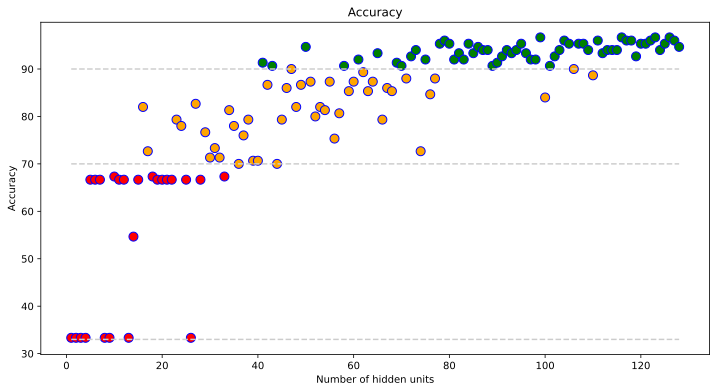

In [156]:
# Report accuracy
fig, ax = plt.subplots(1, figsize=(12, 6))

# Plot each point with conditional coloring
for i in range(len(accuracies)):
    if accuracies[i] < 70:
        color = 'red'
    elif 70 <= accuracies[i] <= 90:
        color = 'orange'
    else:
        color = 'green'
    
    ax.plot(numhiddens[i], accuracies[i], 'o-', color='blue', markerfacecolor=color, markersize=9)

# Add reference lines
ax.plot(numhiddens[[0, -1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot(numhiddens[[0, -1]], [70, 70], '--', color=[.8, .8, .8])
ax.plot(numhiddens[[0, -1]], [90, 90], '--', color=[.8, .8, .8])

# Set labels and title
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')

# Show plot
plt.show()

# Experiments

1. Try changing the data type of the label from integer to float, and compare the result with the original.
2. Perform an experiment that will relate the varying values of learning rate and number of hidden units, and epoch. Create a bubble chart with the x-axis as the number of units, the y-axis as the learning rate, the size as the number of epochs, and the color as the accuracy.